 [Original Colab notebook](https://colab.research.google.com/drive/10RZTRGCA8TPsb_SbNEyszFYvqJT4lijI?usp=sharing)<br/>
 [Dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
dataset_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/Dataset'
pneumonia_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/Viral Pneumonia'
covid_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/COVID'
noncovid_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/Normal'
print(os.path.exists(dataset_dir))

True


In [ ]:
all_nuemonia = [os.path.join(path, name) for (path, dirs, files) in os.walk(pneumonia_dir) for name in files]
print(len(all_nuemonia))

all_covid = [os.path.join(path, name) for (path, dirs, files) in os.walk(covid_dir) for name in files]
print(len(all_covid))

all_non_covid = [os.path.join(path, name) for (path, dirs, files) in os.walk(noncovid_dir) for name in files]
print(len(all_non_covid))

1347
3629
462


In [ ]:
import tensorflow as tf

In [ ]:
#if set_memory_growth is enabled, the runtime initialization will not allocate all memory on the device. 
#Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
datapath = [os.path.join(path, name) for path, subdirs, files in os.walk(dataset_dir) for name in files]
print(len(datapath))

15159


In [ ]:
# print( (os.path.split(datapath[15000])[1]).split('-')[0] )
# pneumonia = []
# for filename in datapath:
#   if (os.path.split(filename)[1]).split('-')[0] == "Viral Pneumonia":
#     pneumonia.append(filename)
pneumonia = [filename for filename in datapath if (os.path.split(filename)[1]).split('-')[0] == "Viral Pneumonia"]
print(len(pneumonia))

covid = [filename for filename in datapath if (os.path.split(filename)[1]).split('-')[0] == "COVID"]
print(len(covid))

non_covid = [filename for filename in datapath if (os.path.split(filename)[1]).split('-')[0] == "Normal"]
print(len(non_covid))


1345
3616
10198


In [ ]:
image_path = pneumonia + covid[:1200] + non_covid[:1341]
print(len(image_path))

3886


In [ ]:
from PIL import Image
import cv2
import numpy as np

In [ ]:
def get_images_and_labels(path):
    n = len(path)
    images = []
    labels = []

    for i in range(1, n):
        image = cv2.imread(path[i])
        # image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        image = Image.fromarray(image)
        # image = Image.open(path[i])
        images.append(image)
        if path[i].split('/')[-2] == 'Non-COVID': labels.append('Non_covid')
        else : labels.append('Covid')

    images = np.array(images, dtype=object)
    labels = np.array(labels, dtype=object)

    return images, labels

In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
images, labels = get_images_and_labels(image_path)

In [ ]:
# import  matplotlib.pyplot as plt
# import numpy as np
# image_path = all_image_path[700]
# print(image_path)
# image = tf.io.read_file(image_path)
# read_image = tf.image.decode_jpeg(image, channels=3)
# # pil_image = Image.open(image_path)
# read_image = np.asarray(read_image)
# plt.figure(figsize=(20, 4))
# plt.imshow(read_image)
# plt.show()

In [ ]:
# print(read_image.shape)
# (_, _, _) = plt.hist(read_image.ravel(), bins=32, density=True)

In [ ]:
# image = tf.convert_to_tensor(read_image, dtype=tf.float32)
# print(image.shape)
# print(type(image))
# np_image = np.asarray(image)
# (_, _,_) = plt.hist(np_image.ravel(), bins=32, density=True)

In [ ]:
# image_path = all_image_path[700]
# ext = os.path.splitext(image_path)[1]
# if ext == ".png" : print(True)

In [ ]:
print(type(images))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(images.shape)
print(labels.shape)

(3885,)
(3885,)


In [ ]:
print(np.unique(labels, return_counts=True))

(array(['Covid', 'Non_covid'], dtype=object), array([1200, 2685]))


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train_original, X_test_original, y_train, y_test = train_test_split(
    images, 
    labels, 
    test_size=400, 
    shuffle=True,
    random_state=42,
    stratify=labels
)

print(X_train_original.shape)
print(y_train.shape)
print(X_test_original.shape)
print(y_test.shape)

(3485,)
(3485,)
(400,)
(400,)


In [ ]:
print(np.unique(y_test, return_counts=True))

(array(['Covid', 'Non_covid'], dtype=object), array([124, 276]))


In [ ]:
X_train_original, X_valid_original, y_train, y_valid = train_test_split(
    X_train_original, 
    y_train, 
    test_size=400, 
    shuffle=True,
    random_state=42,
    stratify=y_train
)


print(X_train_original.shape)
print(y_train.shape)
print(X_test_original.shape)
print(y_test.shape)
print(X_valid_original.shape)
print(y_valid.shape)

(3085,)
(3085,)
(400,)
(400,)
(400,)
(400,)


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_valid, return_counts=True))
print(np.unique(y_test, return_counts=True)) 

(array(['Covid', 'Non_covid'], dtype=object), array([ 952, 2133]))
(array(['Covid', 'Non_covid'], dtype=object), array([124, 276]))
(array(['Covid', 'Non_covid'], dtype=object), array([124, 276]))


In [ ]:
import torchvision.transforms as transforms
# transforms using pytorch api
train_transformer1 = transforms.Compose([
                        transforms.Resize(256),
                        transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor()
])

train_transformer2 = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_transformer3 = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
    transforms.RandomRotation(5),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
                        transforms.Resize(256),
                        transforms.CenterCrop(224),
                        transforms.ToTensor()
])

valid_transformer = transforms.Compose([
                        transforms.Resize((224, 224)),
                        # transforms.CenterCrop(224),
                        transforms.ToTensor()
])



In [ ]:
# import matplotlib.pyplot as plt

# img = X_train_original[4]
# print(type(img))
# print(img.size)
# print(img.getbands())
# torch_image = train_transformer1(img)
# print(type(torch_image))
# print(torch_image.shape)
# aug_image = torch_image.permute(1, 2, 0)
# print(type(aug_image))
# print(aug_image.shape)
# print(aug_image.dtype)
# np_image = np.asarray(aug_image)
# print(np_image.shape)
# print(type(np_image))

# plt.figure(figsize=(20, 4))
# plt.imshow(np_image, cmap='gray')
# plt.show()

In [ ]:
def transforms_on_image(pil_image, transformation):
    torch_image = transformation(pil_image)
    torch_image = torch_image.permute(1, 2, 0)

    augmented_image = np.asarray(torch_image)
    augmented_image = tf.convert_to_tensor(augmented_image, dtype=tf.float32)
    return augmented_image
def transform_set(images, transformation):
    aug_images = []
    for i in range(0, len(images)):
        aug_images.append(transforms_on_image(images[i], transformation))
    
    aug_images = np.array(aug_images)
    return aug_images

In [ ]:
X_train_1 = X_train_original[:1000]
X_train_2 = X_train_original[1000:2000]
X_train_3 = X_train_original[2000:]

In [ ]:
X_train1 = transform_set(X_train_1, train_transformer1)
print(X_train1.shape)
X_train2 = transform_set(X_train_2, train_transformer2)
print(X_train2.shape)
X_train3 = transform_set(X_train_3, train_transformer3)
print(X_train3.shape)

(1000, 224, 224, 3)
(1000, 224, 224, 3)
(1085, 224, 224, 3)


In [ ]:
X_test = transform_set(X_test_original, test_transformer)
print(X_test.shape)

X_valid = transform_set(X_valid_original, test_transformer)
print(X_valid.shape)

X_test_original = transform_set(X_test_original, valid_transformer)
print(X_test_original.shape)

X_valid_original = transform_set(X_valid_original, valid_transformer)
print(X_valid_original.shape)

(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)


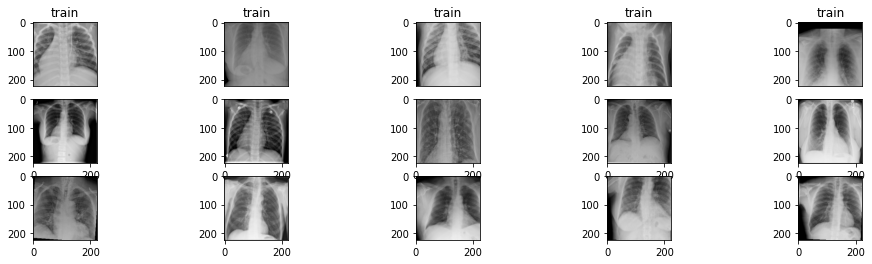

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n=6
for i in range(1, n):
    ax1 = plt.subplot(3, n, i)
    plt.imshow(X_train1[i])
    ax1.title.set_text("train")
    ax1.set_xticks([])

    ax2 = plt.subplot(3, n, i+n)
    plt.imshow(X_train2[i])

    ax3 = plt.subplot(3, n, i+n+n)
    plt.imshow(X_train3[i])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# prepare target

def prepare_targets(y_train, y_test, y_valid):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    y_valid_enc = le.transform(y_valid)
    return y_train_enc, y_test_enc, y_valid_enc

y_train_enc, y_test_enc, y_valid_enc = prepare_targets(y_train, y_test, y_valid)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train_enc, 2)
y_test_cat = to_categorical(y_test_enc, 2)
y_valid_cat = to_categorical(y_valid_enc, 2)

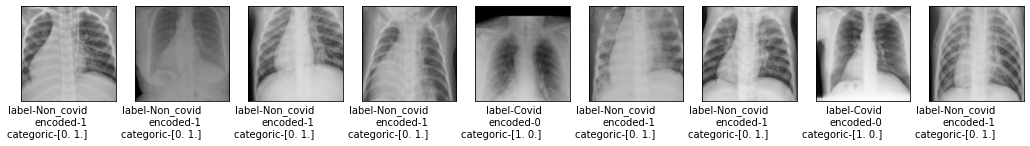

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))

for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train1[i])
    ax.text(0.7, -0.4, "label-{0}\nencoded-{1}\ncategoric-{2}".format(y_train[i], y_train_enc[i], y_train_cat[i]),
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, fontsize=10)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# converting the data to tf.tensor
X_train1 = tf.convert_to_tensor(X_train1)
X_train2 = tf.convert_to_tensor(X_train2)
X_train3 = tf.convert_to_tensor(X_train3)
X_test = tf.convert_to_tensor(X_test)
X_test_original = tf.convert_to_tensor(X_test_original)

X_valid = tf.convert_to_tensor(X_valid)
X_valid_original = tf.convert_to_tensor(X_valid_original)

y_train_enc = tf.convert_to_tensor(y_train_enc)
y_test_enc = tf.convert_to_tensor(y_test_enc)
y_valid_enc = tf.convert_to_tensor(y_valid_enc)

y_train_cat = tf.convert_to_tensor(y_train_cat)
y_test_cat = tf.convert_to_tensor(y_test_cat)
y_valid_cat = tf.convert_to_tensor(y_valid_cat)

Plotting implementation

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
X_train = tf.concat([X_train1, X_train2, X_train3], 0)
# Y_train_cat = tf.concat([y_train_cat, y_train_cat, y_train_cat], 0)
print(X_train.shape)
print(y_train_cat.shape)

(3085, 224, 224, 3)
(3085, 2)


# Model Implementation

Output 1 : VGG19

In [ ]:
vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3))
# vgg_model.summary()
vgg_model.trainable=False 

x = vgg_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(500, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
vgg_output = tf.keras.layers.Dense(2, activation='softmax')(x)

vgg = tf.keras.models.Model(vgg_model.input, vgg_output)
vgg._name='vgg19'
vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model_checkpoint_path = path + '/models/test1/vgg'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)
# model_earlystopping_callback = tf.keras.callbacks.EarlyStopping(
#                                                     monitor='val_loss',
#                                                     patience = 5,
#                                                     mode='min')

In [ ]:
vgg.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

vgg_history = vgg.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size = 16,
                    validation_data=(X_valid_original, y_valid_cat))
vgg.save(model_checkpoint_path)

Epoch 1/100
193/193 [==============================] - 69s 293ms/step - loss: 1.1172 - binary_accuracy: 0.6694 - val_loss: 0.4174 - val_binary_accuracy: 0.8275
Epoch 2/100
193/193 [==============================] - 58s 302ms/step - loss: 0.5125 - binary_accuracy: 0.7384 - val_loss: 0.4140 - val_binary_accuracy: 0.7150
Epoch 3/100
193/193 [==============================] - 54s 279ms/step - loss: 0.4669 - binary_accuracy: 0.7585 - val_loss: 0.5023 - val_binary_accuracy: 0.7675
Epoch 4/100
193/193 [==============================] - 58s 302ms/step - loss: 0.4996 - binary_accuracy: 0.7167 - val_loss: 0.4093 - val_binary_accuracy: 0.7050
Epoch 5/100
193/193 [==============================] - 58s 302ms/step - loss: 0.4963 - binary_accuracy: 0.7118 - val_loss: 0.3825 - val_binary_accuracy: 0.8300
Epoch 6/100
193/193 [==============================] - 54s 278ms/step - loss: 0.4850 - binary_accuracy: 0.7138 - val_loss: 0.3832 - val_binary_accuracy: 0.7575
Epoch 7/100
193/193 [===================

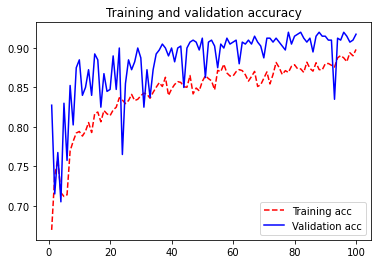

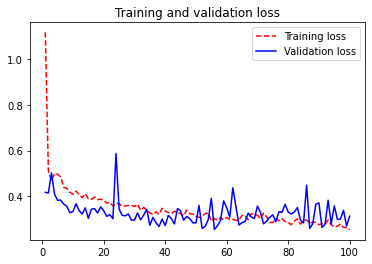

In [ ]:
plot_accuracy_and_loss(vgg_history)

In [ ]:
test_loss, test_acc = vgg.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

13/13 [==============================] - 10s 407ms/step - loss: 0.2241 - binary_accuracy: 0.9250
Accuracy: 0.925000011920929
Loss:  0.22412578761577606


Part 2 - DenseNet 169 

In [ ]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model.trainable=False 

y = dense169_model.layers[-1].output
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dropout(0.5)(y)
y = tf.keras.layers.Dense(1000, activation='relu')(y)
y = tf.keras.layers.Dropout(0.5)(y)
densenet_1_output = tf.keras.layers.Dense(2, activation='softmax')(y)

densenet_1 = tf.keras.models.Model(dense169_model.input, densenet_1_output)
densenet_1._name='densenet_1'
densenet_1.summary()

Model: "densenet_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                        

In [ ]:
model_checkpoint_path = path + '/models/test1/densenet-output2'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
densenet_1.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_1_history = densenet_1.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_valid_original, y_valid_cat))

densenet_1.save(model_checkpoint_path)

Epoch 1/100
193/193 [==============================] - 67s 270ms/step - loss: 2.5835 - binary_accuracy: 0.8276 - val_loss: 0.2152 - val_binary_accuracy: 0.9250
Epoch 2/100
193/193 [==============================] - 50s 257ms/step - loss: 0.3023 - binary_accuracy: 0.8817 - val_loss: 0.6403 - val_binary_accuracy: 0.8250
Epoch 3/100
193/193 [==============================] - 50s 258ms/step - loss: 0.2744 - binary_accuracy: 0.8888 - val_loss: 0.2686 - val_binary_accuracy: 0.8975
Epoch 4/100
193/193 [==============================] - 50s 259ms/step - loss: 0.2221 - binary_accuracy: 0.9057 - val_loss: 0.2007 - val_binary_accuracy: 0.9250
Epoch 5/100
193/193 [==============================] - 49s 257ms/step - loss: 0.2073 - binary_accuracy: 0.9183 - val_loss: 0.2494 - val_binary_accuracy: 0.9200
Epoch 6/100
193/193 [==============================] - 49s 256ms/step - loss: 0.1931 - binary_accuracy: 0.9216 - val_loss: 0.1699 - val_binary_accuracy: 0.9450
Epoch 7/100
193/193 [===================

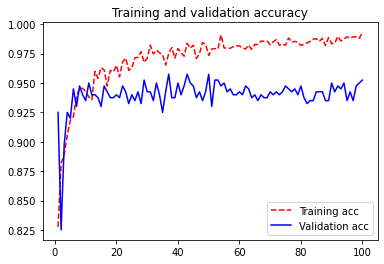

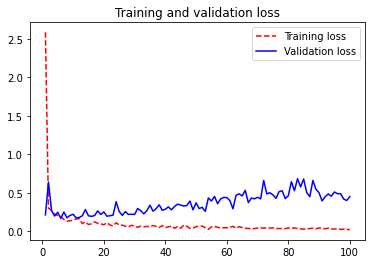

In [ ]:
plot_accuracy_and_loss(densenet_1_history)

In [ ]:
test_loss, test_acc = densenet_1.evaluate(X_test_original,  y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

13/13 [==============================] - 11s 349ms/step - loss: 0.3881 - binary_accuracy: 0.9625
Accuracy: 0.9624999761581421
Loss:  0.38808125257492065


Part 3 - Densenet 169

In [ ]:
dense169_model2 = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(224, 224, 3)
                                      )
# dense169_model.summary()
dense169_model2.trainable=False 
# since the model is already loaded we load in again
z = dense169_model2.layers[-1].output
z = tf.keras.layers.Flatten()(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(1000, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(500, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
z = tf.keras.layers.Dense(200, activation='relu')(z)
z = tf.keras.layers.Dropout(0.5)(z)
densenet_2_output = tf.keras.layers.Dense(2, activation='softmax')(z)

densenet_2 = tf.keras.models.Model(dense169_model2.input, densenet_2_output)
densenet_2._name='densenet_2'
densenet_2.summary()

Model: "densenet_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                        

In [ ]:
model_checkpoint_path = path + '/models/test1/densenet-output3'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
densenet_2.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

densenet_2_history = densenet_2.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size = 16,
                    validation_data=(X_valid_original, y_valid_cat))

densenet_2.save(model_checkpoint_path)

Epoch 1/100
193/193 [==============================] - 66s 272ms/step - loss: 3.1537 - binary_accuracy: 0.7410 - val_loss: 0.2968 - val_binary_accuracy: 0.8850
Epoch 2/100
193/193 [==============================] - 50s 257ms/step - loss: 0.4197 - binary_accuracy: 0.8233 - val_loss: 0.2646 - val_binary_accuracy: 0.8875
Epoch 3/100
193/193 [==============================] - 50s 257ms/step - loss: 0.3676 - binary_accuracy: 0.8512 - val_loss: 0.2935 - val_binary_accuracy: 0.8625
Epoch 4/100
193/193 [==============================] - 50s 259ms/step - loss: 0.3666 - binary_accuracy: 0.8506 - val_loss: 0.2494 - val_binary_accuracy: 0.9050
Epoch 5/100
193/193 [==============================] - 50s 257ms/step - loss: 0.3194 - binary_accuracy: 0.8762 - val_loss: 0.2593 - val_binary_accuracy: 0.8800
Epoch 6/100
193/193 [==============================] - 50s 259ms/step - loss: 0.2860 - binary_accuracy: 0.8794 - val_loss: 0.2208 - val_binary_accuracy: 0.9000
Epoch 7/100
193/193 [===================

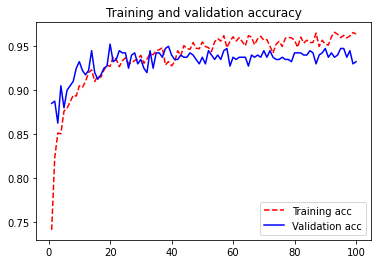

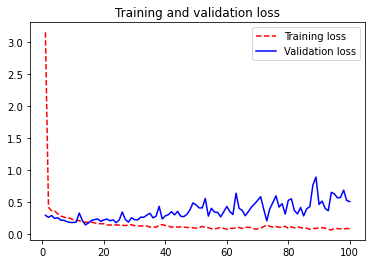

In [ ]:
plot_accuracy_and_loss(densenet_2_history)

In [ ]:
test_loss, test_acc = densenet_2.evaluate(X_test_original, y_test_cat)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

13/13 [==============================] - 9s 350ms/step - loss: 0.4991 - binary_accuracy: 0.9450
Accuracy: 0.9449999928474426
Loss:  0.49910828471183777


Ensembling all the models

In [ ]:
vgg = tf.keras.models.load_model(path+'/models/test1/vgg')
densenet_1 = tf.keras.models.load_model(path+'/models/test1/densenet-output2')
densenet_2 = tf.keras.models.load_model(path+'/models/test1/densenet-output3')

In [ ]:
# print(X_train.shape)
# train = tf.concat([X_train, X_train2, X_train3], 0)
# labels = tf.concat([y_train_enc, y_train_enc, y_train_enc], 0)
# print(train.shape)
# print(labels.shape)

In [ ]:
vgg.trainable = False
densenet_1.trainable = False
densenet_2.trainable = False
models = [vgg, densenet_1, densenet_2]
# to avoid conflicts with naming
for layer in models[0].layers:
    layer._name = layer.name + str('_0')
for layer in models[1].layers:
    layer._name = layer.name + str('_1')
for layer in models[2].layers:
    layer._name = layer.name + str('_2')

In [ ]:
# ensemble = tf.keras.models.load_model(path + "/models/test5/ensemble")

In [ ]:
average = tf.keras.layers.Average()([vgg.output, densenet_1.output, densenet_2.output])
dense = tf.keras.layers.Dense(1, activation='sigmoid')(average)

ensemble = tf.keras.Model([vgg.input, densenet_1.input, densenet_2.input], dense)

In [ ]:
ensemble.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4_2 (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4_2 (ZeroPaddin  (None, 230, 230, 3)  0          ['input_4_2[0][0]']              
 g2D)                                                                                             
                                                                                                  
 conv1/conv_2 (Conv2D)          (None, 112, 112, 64  9408        ['zero_padding2d_4_2[0][0]']     
                                )                                                             

In [ ]:
# from keras.utils.vis_utils import plot_model

In [ ]:
# plot_model(ensembled, to_file = 'new_model.png', dpi=50)

In [ ]:
ensemble.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
model_checkpoint_path = path + '/models/test1/ensemble'
## callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                                    filepath=model_checkpoint_path,
                                                    save_weights_only=False,
                                                    monitor='val_loss',
                                                    mode='min',
                                                    save_best_only=True)

In [ ]:
ensemble_history = ensemble.fit([X_train, X_train, X_train],y_train_enc,
                                epochs=100,
                                validation_data=([X_valid_original, X_valid_original, X_valid_original], y_valid_enc),
                                batch_size = 16)
ensemble.save(model_checkpoint_path)

Epoch 1/100
193/193 [==============================] - 166s 652ms/step - loss: 0.4599 - binary_accuracy: 0.9079 - val_loss: 0.4222 - val_binary_accuracy: 0.9225
Epoch 2/100
193/193 [==============================] - 103s 535ms/step - loss: 0.4171 - binary_accuracy: 0.9086 - val_loss: 0.3825 - val_binary_accuracy: 0.9250
Epoch 3/100
193/193 [==============================] - 112s 582ms/step - loss: 0.3778 - binary_accuracy: 0.9216 - val_loss: 0.3504 - val_binary_accuracy: 0.9250
Epoch 4/100
193/193 [==============================] - 112s 582ms/step - loss: 0.3503 - binary_accuracy: 0.9271 - val_loss: 0.3242 - val_binary_accuracy: 0.9300
Epoch 5/100
193/193 [==============================] - 103s 534ms/step - loss: 0.3272 - binary_accuracy: 0.9284 - val_loss: 0.3022 - val_binary_accuracy: 0.9300
Epoch 6/100
193/193 [==============================] - 103s 534ms/step - loss: 0.3050 - binary_accuracy: 0.9277 - val_loss: 0.2834 - val_binary_accuracy: 0.9325
Epoch 7/100
193/193 [=============

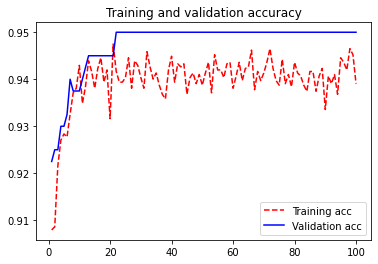

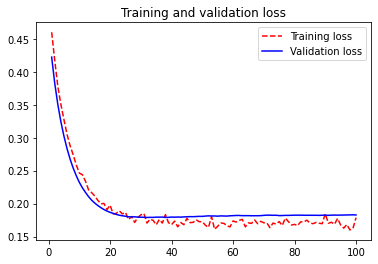

In [ ]:
plot_accuracy_and_loss(ensemble_history)

In [ ]:
test_loss, test_acc = ensemble.evaluate([X_test_original, X_test_original, X_test_original],  y_test_enc)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

13/13 [==============================] - 35s 810ms/step - loss: 0.1292 - binary_accuracy: 0.9600
Accuracy: 0.9599999785423279
Loss:  0.12923651933670044


Load ensemble model for further evaluation of performance matrix

In [ ]:
ensemble = tf.keras.models.load_model(path + "/models/test1/ensemble")

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(ensemble, to_file = path + '/models/test1/ensemble.png', dpi=50)

In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])

In [ ]:
num = 280
print(type(y_pred))
print(y_pred[num-10:num])
print(y_test_enc[num])
y_test_enc = np.array(y_test_enc)
print(type(y_test_enc))

<class 'numpy.ndarray'>
[[0.98773265]
 [0.98773265]
 [0.9392985 ]
 [0.05316231]
 [0.25958288]
 [0.98773265]
 [0.98773265]
 [0.9856546 ]
 [0.9876868 ]
 [0.98773265]]
tf.Tensor(0, shape=(), dtype=int64)
<class 'numpy.ndarray'>


In [ ]:
y_pred[y_pred > 0.6] = 1.0
y_pred[y_pred <= 0.6] = 0.0

In [ ]:
print(y_pred.shape)

(400, 1)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

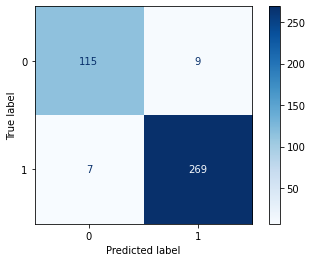

In [ ]:
cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [ ]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

In [ ]:
# binary_classification_performance(y_test_enc, y_pred)
result6 = binary_classification_performance(y_test_enc, y_pred)
display(result6)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.95,0.97,0.97,115,269,9,7


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.1] = 1.0
y_pred[y_pred <= 0.1] = 0.0
print("threshold - 0.1")
result1 = binary_classification_performance(y_test_enc, y_pred)
display(result1)

threshold - 0.1


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.92,0.91,0.99,0.95,0.89,0.91,0.99,98,272,26,4


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.2] = 1.0
y_pred[y_pred <= 0.2] = 0.0
print("threshold - 0.2")
result2 = binary_classification_performance(y_test_enc, y_pred)
display(result2)

threshold - 0.2


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.94,0.93,0.98,0.95,0.91,0.93,0.98,104,271,20,5


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.3] = 1.0
y_pred[y_pred <= 0.3] = 0.0
print("threshold - 0.3")
result3 = binary_classification_performance(y_test_enc, y_pred)
display(result3)

threshold - 0.3


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.95,0.97,0.97,115,269,9,7


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.4] = 1.0
y_pred[y_pred <= 0.4] = 0.0
print("threshold - 0.4")
result4 = binary_classification_performance(y_test_enc, y_pred)
display(result4)

threshold - 0.4


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.95,0.97,0.97,115,269,9,7


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 0.0
print("threshold - 0.5")
result5 = binary_classification_performance(y_test_enc, y_pred)
display(result5)

threshold - 0.5


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.95,0.97,0.97,115,269,9,7


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.7] = 1.0
y_pred[y_pred <= 0.7] = 0.0
print("threshold - 0.7")
result7 = binary_classification_performance(y_test_enc, y_pred)
display(result7)

threshold - 0.7


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.96,0.97,0.97,116,269,8,7


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.8] = 1.0
y_pred[y_pred <= 0.8] = 0.0
print("threshold - 0.8")
result8 = binary_classification_performance(y_test_enc, y_pred)
display(result8)

threshold - 0.8


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.97,0.97,0.97,0.96,0.97,0.97,117,267,7,9


In [ ]:
y_pred = ensemble.predict([X_test_original, X_test_original, X_test_original])
y_pred[y_pred > 0.9] = 1.0
y_pred[y_pred <= 0.9] = 0.0
print("threshold - 0.9")
result9 = binary_classification_performance(y_test_enc, y_pred)
display(result9)

threshold - 0.9


,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.96,0.99,0.95,0.97,0.96,0.99,0.95,120,263,4,13


In [ ]:
results = [result1, result2, result3, result4, result5, result6, result7, result8, result9 ]

In [ ]:
accuracies = [i['Accuracy'] for i in results ]
recalls = [i['Recall (senitivity or TPR)'] for i in results ]
precisions = [i['Precision (or PPV)'] for i in results ]
f1s = [i['f1 score'] for i in results ]

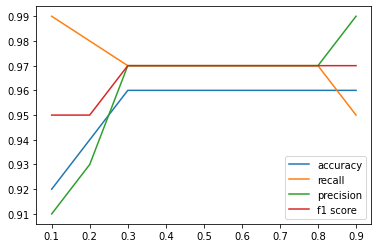

In [ ]:
X = np.linspace(0.1, 0.9, 9)
plt.plot(X, accuracies, label="accuracy")
plt.plot(X, recalls, label='recall')
plt.plot(X, precisions, label='precision')
plt.plot(X, f1s, label='f1 score')
plt.legend()
plt.show()

In [ ]:
results = pd.concat(results)

In [ ]:
results.insert(0, "Threshold", X, True)

In [ ]:
results = results.reset_index(drop=True)

In [ ]:
pd.set_option('precision', 3)

In [ ]:
results.style.highlight_max(color = 'black')
# your_df.style.highlight_max(color = 'green')

,Threshold,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.100,0.920,0.910,0.990,0.950,0.890,0.910,0.990,98,272,26,4
1,0.200,0.940,0.930,0.980,0.950,0.910,0.930,0.980,104,271,20,5
2,0.300,0.960,0.970,0.970,0.970,0.950,0.970,0.970,115,269,9,7
3,0.400,0.960,0.970,0.970,0.970,0.950,0.970,0.970,115,269,9,7
4,0.500,0.960,0.970,0.970,0.970,0.950,0.970,0.970,115,269,9,7
5,0.600,0.960,0.970,0.970,0.970,0.950,0.970,0.970,115,269,9,7
6,0.700,0.960,0.970,0.970,0.970,0.960,0.970,0.970,116,269,8,7
7,0.800,0.960,0.970,0.970,0.970,0.960,0.970,0.970,117,267,7,9
8,0.900,0.960,0.990,0.950,0.970,0.960,0.990,0.950,120,263,4,13
